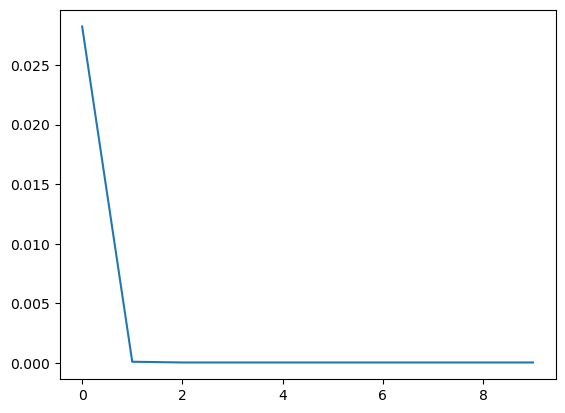

In [7]:
import torch
import random
import matplotlib.pyplot as plt
lr = 0.03
num_epochs = 10
batch_size = 10


def synthetic_data(w, b, num_examples):
    # 生成 y = Xw + b + 噪声
    X = torch.normal(mean=0, std=1, size=(num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(mean=0, std=0.01, size=y.shape)
    return X, y.reshape((-1, 1))


def data_iter(features, labels, batch_size):
    num_examples = len(features)
    idx = list(range(num_examples))
    random.shuffle(idx)  # 打乱索引 随机读取样本
    for i in range(0, num_examples, batch_size):
        batch_idx = torch.tensor(idx[i: min(num_examples, i+batch_size)])
        yield features[batch_idx], labels[batch_idx]


def linreg(X, w, b): # 定义模型:线性回归
    return torch.matmul(X, w) + b


def squared_loss(y_hat, y): # 定义损失函数:均方损失
    return (y_hat-y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size): # 定义优化方法:小批量剃度下降
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # 更新参数
            param.grad.zero_() # 清除累积的梯度

true_w = torch.tensor([2, -3.4]) # 定义w和b的实际值
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000) # 用实际值产生样本和样本标签
net = linreg
loss_function = squared_loss
w = torch.normal(mean=0, std=1, size=true_w.shape, requires_grad=True) # 初始化模型参数
b = torch.zeros(1, requires_grad=True)
train_loss_res = []
error_w_res = []
error_b_res = []

for epoch in range(num_epochs): # 训练
    for X, y in data_iter(features, labels, batch_size):
        loss = loss_function(net(X, w, b), y) # X和y的小批量损失
        loss.sum().backward() # loss不是一个标量，所以先求和成为标量，并以此计算关于w和b的梯度
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_loss = loss_function(net(features, w, b), labels)
        train_loss_res.append(train_loss.mean())
        error_w_res.append(torch.abs(true_w-w).mean())
        error_b_res.append(torch.abs(true_b-b).mean())
plt.plot([epoch for epoch in range(num_epochs)],train_loss_res)
